In [1]:
import pandas_datareader as pdr
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## What is a Technical Indicator?

1) Mathematical calculation on stock's prices/Volume.  
* We need to be as objetive as possible.  We want to take the emotions out of the equation. 

2) Values uses to anticipate future changes in price.
* As an investor, we want to see if the price goes up or the price goes down or it's just stable.

3) Two types of indicatiors: Leading and lagging. 
* The leading indicators, those are attempting to forecast what prices will do in the future. If you're looking at a stock price what will happen in one week?
* **Lagging:** Movements in relatively long trends. So it's more like confirming that what you're that what you think the stock price is doing right?

## Moving Average

1) Momentum indicator/ lagging indicator.

2) Average of a price over the last X days.

3) Smooth out the price data.

4) Two types: Simple Moving Average (SMA) and Exponential Moving Average (EMA). The last one it puts most weight on the recent days.

5) **Signal:** Close price > MAn

6) https://www.investopedia.com/terms/m/movingaverage.asp

$MAn_i = \frac{C_{i-(n-1)} + C_{i-(n-2)} + \cdots + C_{i-1} + C_i}{n}$

$MA10_{i} = \frac{C_{i-9} + C_{i-8} + \cdots + C_{i-1} + C_i}{n}$
- $MAn_i$: Moving average of period $n$ at trading day $i$.
- $n$: Period.
- $C_i$: Closing price at trading day $i$.

In [2]:
start = dt.datetime(2019,1,1)
fb = pdr.get_data_yahoo("FB", start)

In [3]:
fb['MA21'] = fb['Close'].rolling(21).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
fb['MA200'] = fb['Close'].rolling(200).mean()
fb.tail()

,High,Low,Open,Close,Volume,Adj Close,MA21,MA50,MA200
Date,,,,,,,,,
2021-06-17,337.980011,330.149994,330.489990,336.510010,17794100,336.510010,329.047619,318.052798,283.483999
2021-06-18,336.149994,329.000000,334.529999,329.660004,23025100,329.660004,329.812857,318.385599,283.655099
2021-06-21,332.920013,327.649994,331.089996,332.290009,11337500,332.290009,330.464287,318.782199,283.804050
2021-06-22,339.920013,332.600006,332.690002,339.029999,15330800,339.029999,331.550001,319.331999,284.043600
2021-06-23,343.419891,338.239990,339.350006,341.880005,11262410,341.880005,332.371429,319.974399,284.339350


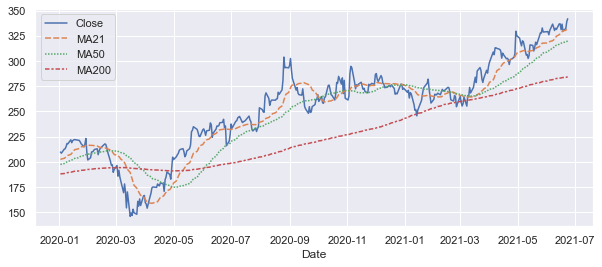

In [4]:
fig, ax = plt.subplots(figsize=[10,4])
ax = sns.lineplot(data=fb.loc['2020-01-01':][['Close', 'MA21','MA50','MA200']])
#ax.get_title('Close Price & MA10')#,fontsize=16)

In [5]:
fb['Signal'] = fb['Close'] > fb['MA21']
fb.tail()

,High,Low,Open,Close,Volume,Adj Close,MA21,MA50,MA200,Signal
Date,,,,,,,,,,
2021-06-17,337.980011,330.149994,330.489990,336.510010,17794100,336.510010,329.047619,318.052798,283.483999,True
2021-06-18,336.149994,329.000000,334.529999,329.660004,23025100,329.660004,329.812857,318.385599,283.655099,False
2021-06-21,332.920013,327.649994,331.089996,332.290009,11337500,332.290009,330.464287,318.782199,283.804050,True
2021-06-22,339.920013,332.600006,332.690002,339.029999,15330800,339.029999,331.550001,319.331999,284.043600,True
2021-06-23,343.419891,338.239990,339.350006,341.880005,11262410,341.880005,332.371429,319.974399,284.339350,True


## Exponential Moving Average
- https://www.investopedia.com/terms/m/movingaverage.asp

In [6]:
fb['EMA21'] = fb['Close'].ewm(span=21, adjust=False).mean()
fb['EMA50'] = fb['Close'].ewm(span=50, adjust=False).mean()
fb['EMA200'] = fb['Close'].ewm(span=200, adjust=False).mean()
fb.tail(10)

,High,Low,Open,Close,Volume,Adj Close,MA21,MA50,MA200,Signal,EMA21,EMA50,EMA200
Date,,,,,,,,,,,,,
2021-06-10,333.940002,328.549988,330.790009,332.459991,13240200,332.459991,323.180952,315.034399,282.446200,True,325.064210,313.745242,281.526576
2021-06-11,332.829987,328.929993,332.579987,331.260010,13587900,331.260010,324.548096,315.768999,282.698400,True,325.627464,314.432095,282.021436
2021-06-14,336.820007,329.809998,331.899994,336.769989,12250800,336.769989,326.048571,316.531199,282.862700,True,326.640421,315.308091,282.566198
2021-06-15,339.920013,335.029999,336.989990,336.750000,15795200,336.750000,327.039523,317.087999,283.080350,True,327.559474,316.148950,283.105340
2021-06-16,337.549988,328.720001,336.700012,331.079987,17232200,331.079987,327.783332,317.584398,283.267449,True,327.879520,316.734481,283.582700
2021-06-17,337.980011,330.149994,330.489990,336.510010,17794100,336.510010,329.047619,318.052798,283.483999,True,328.664110,317.509992,284.109340
2021-06-18,336.149994,329.000000,334.529999,329.660004,23025100,329.660004,329.812857,318.385599,283.655099,False,328.754646,317.986463,284.562580
2021-06-21,332.920013,327.649994,331.089996,332.290009,11337500,332.290009,330.464287,318.782199,283.804050,True,329.076043,318.547387,285.037480
2021-06-22,339.920013,332.600006,332.690002,339.029999,15330800,339.029999,331.550001,319.331999,284.043600,True,329.980948,319.350626,285.574719


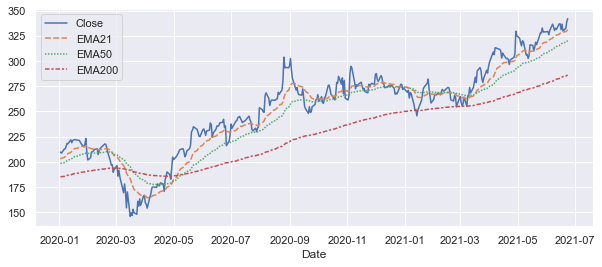

In [7]:
fig, ax = plt.subplots(figsize=[10,4])
ax = sns.lineplot(data=fb.loc['2020-01-01':][['Close', 'EMA21','EMA50','EMA200']])

In [8]:
fb['Signal2'] = fb['Close'] > fb['EMA21']
fb.tail(10)

,High,Low,Open,Close,Volume,Adj Close,MA21,MA50,MA200,Signal,EMA21,EMA50,EMA200,Signal2
Date,,,,,,,,,,,,,,
2021-06-10,333.940002,328.549988,330.790009,332.459991,13240200,332.459991,323.180952,315.034399,282.446200,True,325.064210,313.745242,281.526576,True
2021-06-11,332.829987,328.929993,332.579987,331.260010,13587900,331.260010,324.548096,315.768999,282.698400,True,325.627464,314.432095,282.021436,True
2021-06-14,336.820007,329.809998,331.899994,336.769989,12250800,336.769989,326.048571,316.531199,282.862700,True,326.640421,315.308091,282.566198,True
2021-06-15,339.920013,335.029999,336.989990,336.750000,15795200,336.750000,327.039523,317.087999,283.080350,True,327.559474,316.148950,283.105340,True
2021-06-16,337.549988,328.720001,336.700012,331.079987,17232200,331.079987,327.783332,317.584398,283.267449,True,327.879520,316.734481,283.582700,True
2021-06-17,337.980011,330.149994,330.489990,336.510010,17794100,336.510010,329.047619,318.052798,283.483999,True,328.664110,317.509992,284.109340,True
2021-06-18,336.149994,329.000000,334.529999,329.660004,23025100,329.660004,329.812857,318.385599,283.655099,False,328.754646,317.986463,284.562580,True
2021-06-21,332.920013,327.649994,331.089996,332.290009,11337500,332.290009,330.464287,318.782199,283.804050,True,329.076043,318.547387,285.037480,True
2021-06-22,339.920013,332.600006,332.690002,339.029999,15330800,339.029999,331.550001,319.331999,284.043600,True,329.980948,319.350626,285.574719,True


## MACD
- MACD = Moving Average Convergence/Divergence
- is the relatinship between two eponential moving average(EMA) of prices
- MACD is a lagging indicator when trading on the crossovers
- https://www.investopedia.com/terms/m/macd.asp

**Calculation** (12-26-9 MACD (default), 8-17-9 MACD (more responsive))
- MACD=12-Period EMA − 26-Period EMA
- Singal line 9-Perioed EMA of MACD

**Signal**
- MACD > Signal line = BUY

In [9]:
exp1 = fb['Close'].ewm(span=8, adjust=False).mean()
exp2 = fb['Close'].ewm(span=17, adjust=False).mean()
fb['MACD'] = exp1 - exp2
fb['Signal line'] = fb['MACD'].ewm(span=9, adjust=False).mean()

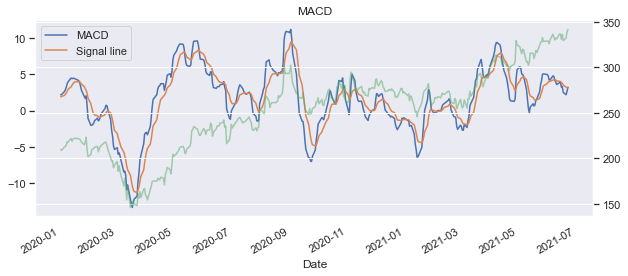

In [10]:
fig,ax = plt.subplots(figsize=[10,4])
fb[['MACD', 'Signal line']].loc['2020-01-01':].plot(ax=ax)
fb['Close'].loc['2020-01-01':].plot(ax=ax,secondary_y=True, alpha=0.5)
plt.title('MACD')
plt.show()

In [11]:
fb['Signal3']=fb['MACD'] > fb['Signal line']
fb['Signal3']

Date
2019-01-02    False
2019-01-03    False
2019-01-04     True
2019-01-07     True
2019-01-08     True
              ...  
2021-06-17    False
2021-06-18    False
2021-06-21    False
2021-06-22    False
2021-06-23     True
Name: Signal3, Length: 624, dtype: bool

### Stochastic oscillator
- Lagging indicator
- https://www.investopedia.com/terms/s/stochasticoscillator.asp

**Calculations**
- 14-high: Maximum of last 14 trading days
- 14-low: Minimum of last 14 trading days
- %K: (Last close - 14-low)*100 / (14-high - 14-low)
- %D: Simple Moving Average of %K

**Signal**
- %K > %D

In [14]:
high14 = fb['High'].rolling(14).max()
low14 = fb['Low'].rolling(14).min()
# %K: (Last close - 14-low)*100 / (14-high - 14-low)
fb['%K'] = pct_k = (fb['Close'] - low14)*100 / (high14 - low14)
fb['%D'] = pct_d = pct_k.rolling(3).mean()
fb['Signal'] = pct_k > pct_d

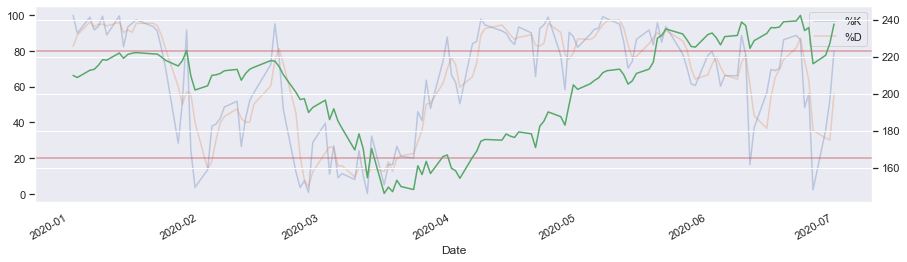

In [18]:
fig, ax = plt.subplots(figsize=[15,4])
fb.loc['2020-01-01':'2020-07-01'][['%K', '%D']].plot(ax=ax, alpha=0.3)
ax.axhline(80, c='r', alpha=0.5)
ax.axhline(20, c='r', alpha=0.5)
fb.loc['2020-01-01':'2020-07-01']['Close'].plot(ax=ax, secondary_y=True)
plt.show()